# <span style="color:cyan"> House Prices - Advanced Regression Techniques
### <span style="color:lightblue"> DATASET obtenido desde las competiciones de kaggle.com

#### <span style="color:#87CEEB"> Objetivo: Predecir el precio de venta para cada casa.

#### <span style="color:#87CEEB"> La métrica que se busca mejorar es el RMSE.
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

## <span style="color:orange"> Librerías a utilizar

In [1]:
# Ingesta
import numpy as np
import pandas as pd
import scipy.stats as stats

# Preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.gridspec as gridspec
import sweetviz as sv

# Modelación
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor

# Métricas de evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Otros
import funciones as f
import warnings
warnings.filterwarnings("ignore")

c:\Users\Rodrigo\anaconda3\envs\conda_env_1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### <span style="color:orange"> Significado de columnas:
- SalePrice: Precio de la propiedad en dólares. Este es el vector objetivo.

- MSSubClass: La clase de construcción

- MSZoning: La clasificación general de zonificación

- LotFrontage: Pies lineales de calle conectados a la propiedad

- LotArea: Tamaño del lote en pies cuadrados

- Street: Tipo de acceso por carretera

- Alley: Tipo de acceso al callejón

- LotShape: Forma general de la propiedad.

- LandContour: Llanura de la propiedad

- Utilities: Tipo de utilidades disponibles

- LotConfig: Configuración del lote

- LandSlope: Pendiente de la propiedad

- Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames

- Condition1: Proximidad a carretera principal o vía férrea

- Condition2: Proximidad a la carretera principal o vía férrea (si hay una segunda presente)

- BldgType: Tipo de vivienda

- HouseStyle: Estilo de vivienda

- OverallQual: Material general y calidad de acabado.

- OverallCond: Calificación de condición general

- YearBuilt: Fecha original de construcción

- YearRemodAdd: Fecha de remodelación

- RoofStyle: Tipo de techo

- RoofMatl: Material del techo

- Exterior1st: Revestimiento exterior de la casa

- Exterior2nd: Revestimiento exterior de la casa (si hay más de un material)

- MasVnrType: Tipo de barniz de mampostería

- MasVnrArea: Área de revestimiento de mampostería en pies cuadrados

- ExterQual: Calidad de materiales exteriores

- ExterCond: Estado actual del material en el exterior

- Foundation: Tipo de cimiento

- BsmtQual: Altura del sótano

- BsmtCond: Estado general del sótano.

- BsmtExposure: Muros de sótano a nivel de salida o jardín

- BsmtFinType1: Calidad del área terminada del sótano

- BsmtFinSF1: Tipo 1 pies cuadrados terminados

- BsmtFinType2: Calidad de la segunda área terminada (si está presente)

- BsmtFinSF2: Tipo 2 pies cuadrados terminados

- BsmtUnfSF: Pies cuadrados sin terminar del área del sótano

- TotalBsmtSF: Pies cuadrados totales del área del sótano

- Heating: Tipo de calefacción

- HeatingQC: Calidad y estado de la calefacción.

- CentralAir: Aire acondicionado central

- Electrical: Sistema eléctrico

- 1stFlrSF: Pies cuadrados del primer piso

- 2ndFlrSF: Metros cuadrados del segundo piso

- LowQualFinSF: Metros cuadrados acabados de baja calidad (todos los pisos)

- GrLivArea: Pies cuadrados de superficie habitable sobre el nivel del suelo (suelo)

- BsmtFullBath: Baños completos en sótano

- BsmtHalfBath: Medios baños del sótano

- FullBath: Baños completos sobre rasante

- HalfBath: Medios baños sobre rasante

- Bedroom: Número de habitaciones sobre el nivel del sótano

- Kitchen: Número de cocinas

- KitchenQual: Calidad de la cocina

- TotRmsAbvGrd: Total habitaciones sobre rasante (no incluye baños)

- Functional: Calificación de la funcionalidad del hogar

- Fireplaces: Número de chimeneas

- FireplaceQu: Calidad de chimenea

- GarageType: Ubicación del garaje

- GarageYrBlt: Año de construcción del garaje

- GarageFinish: Acabado interior del garaje.

- GarageCars: Tamaño del garaje en capacidad de automóviles

- GarageArea: Tamaño del garaje en pies cuadrados

- GarageQual: Calidad de garaje

- GarageCond: Estado del garaje

- PavedDrive: Entrada pavimentada

- WoodDeckSF: Área de cubierta de madera en pies cuadrados

- OpenPorchSF: Área de porche abierto en pies cuadrados

- EnclosedPorch: Área de porche cerrado en pies cuadrados

- 3SsnPorch: Área de porche de tres estaciones en pies cuadrados

- ScreenPorch: Área del porche con mosquitero en pies cuadrados

- PoolArea: Área de la piscina en pies cuadrados

- PoolQC: Calidad de la piscina

- Fence: Calidad de la cerca

- MiscFeature: Característica miscelánea no cubierta en otras categorías

- MiscVal: Valor de la característica miscelánea

- MoSold: Mes de venta

- YrSold: Año de venta

- SaleType: Tipo de venta

- SaleCondition: Condición de venta

## <span style="color:orange"> Carga de datasets

In [2]:
# carga de datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# df_train
display(df_train.head())
df_train.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

In [4]:
# df_test
display(df_test.head())
df_test.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)

## <span style="color:orange"> EDA con Sweetviz

In [5]:
#report = sv.compare([df_train, "Train"], [df_test, "Test"])

#report.show_html("report.html")

## <span style="color:orange"> Análisis vector objetivo

In [6]:
df_train.SalePrice.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


### <span style="color:#87CEEB"> Cantidad de nulos

In [7]:
# presencia de nulos
df_train['SalePrice'].isna().value_counts().to_string()

'False    1460'

    No existen datos nulos en el vector objetivo.

### <span style="color:#87CEEB"> Distribución de observaciones

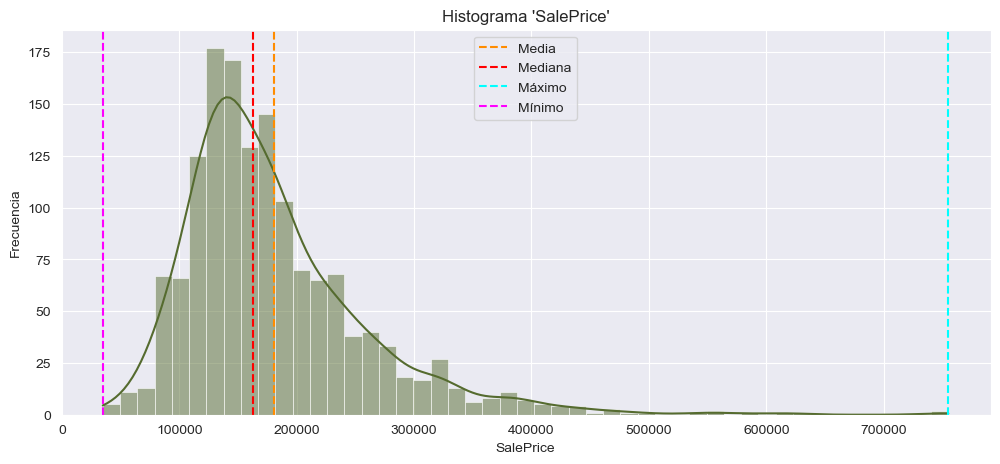

In [8]:
f.plot_hist(df_train, 'SalePrice', figsize=(12,5))

## <span style="color:orange"> Distribución de variables continuas

In [9]:
df_train.drop(['SalePrice'], axis=1).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [10]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
continuous_columns_train = df_train.select_dtypes(include=['int64', 'float64'])
continuous_columns_test = df_test.select_dtypes(include=['int64', 'float64'])

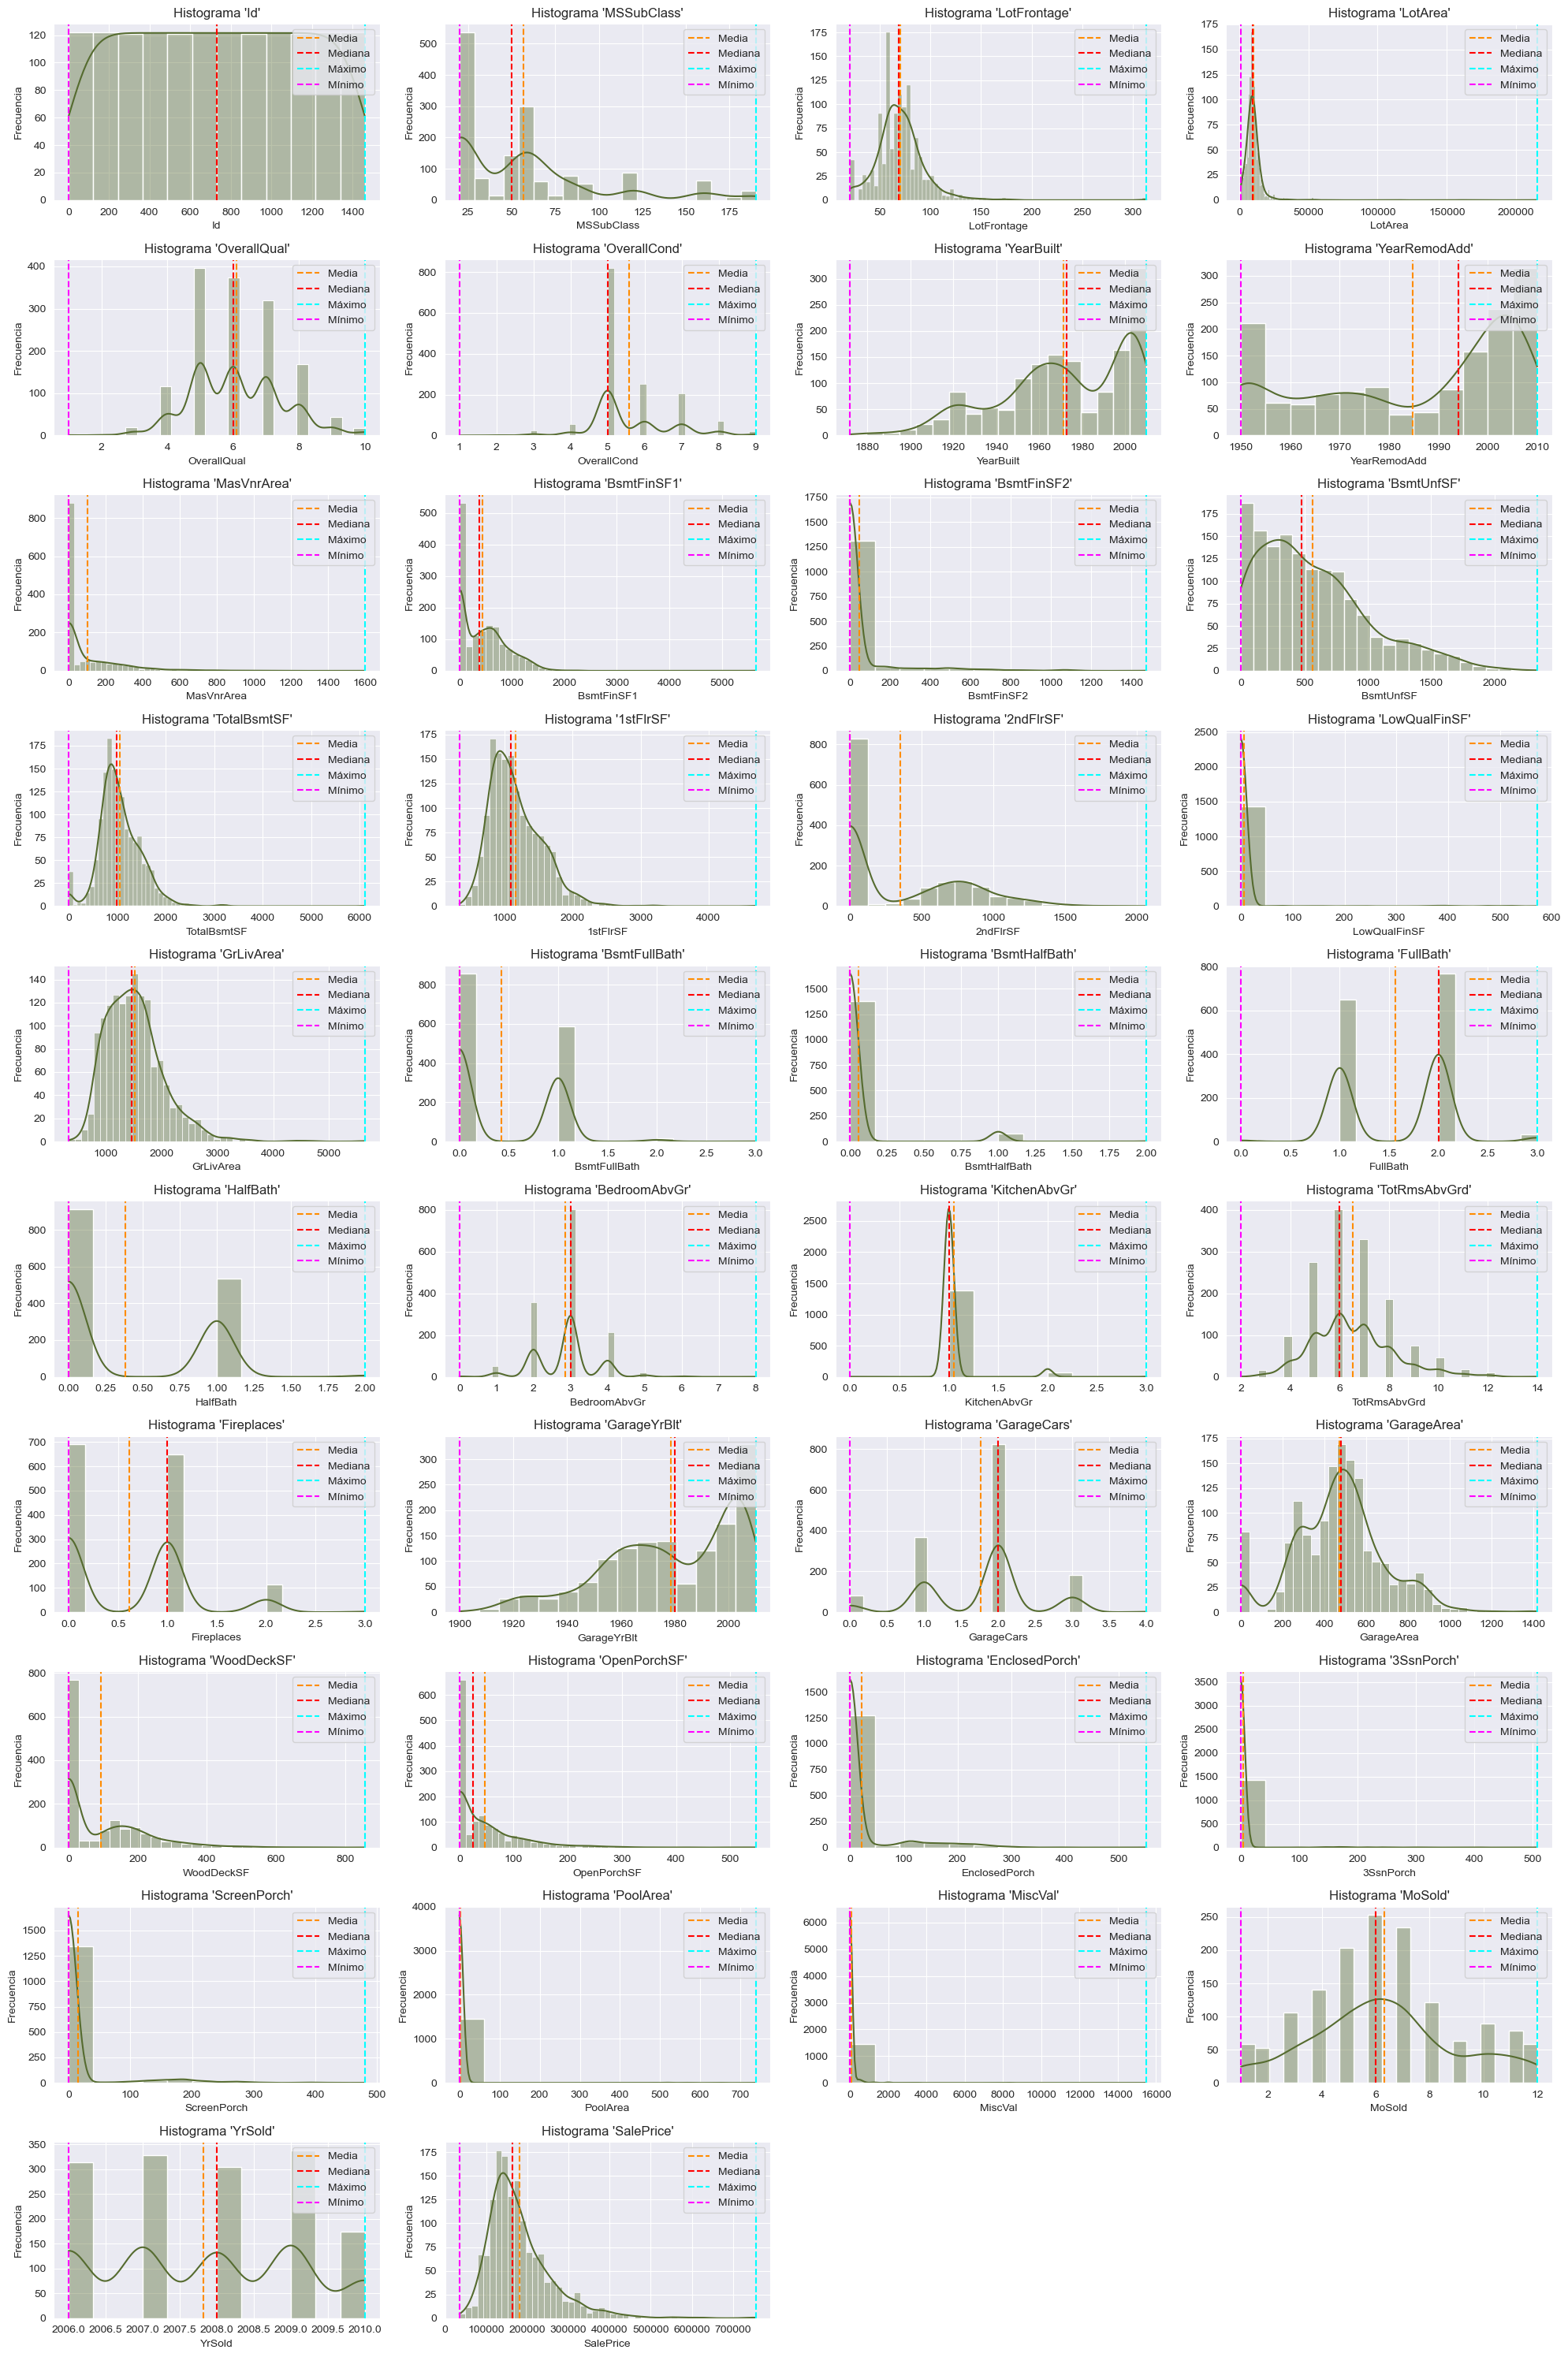

In [12]:
f.distribuciones_continuas(continuous_columns_train)

### <span style="color:#87CEEB"> Correlaciones

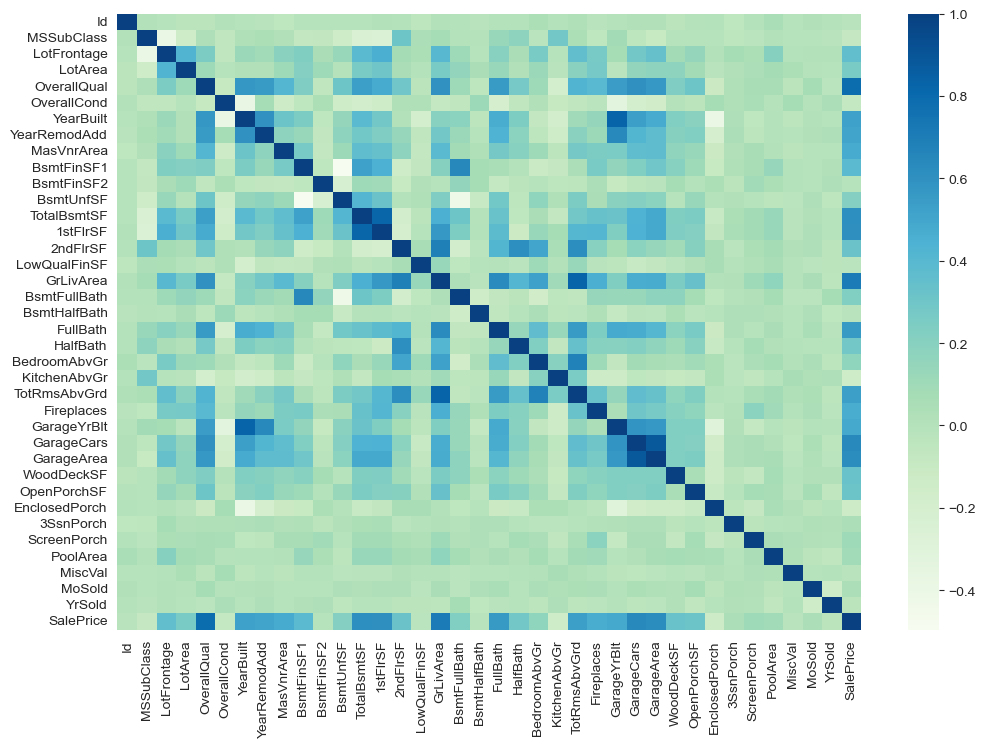

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), cmap='GnBu');

## <span style="color:orange"> Distribución de variables categóricas

In [14]:
categorical_columns_train = df_train.select_dtypes(include=['object'])
categorical_columns_test = df_test.select_dtypes(include=['object'])

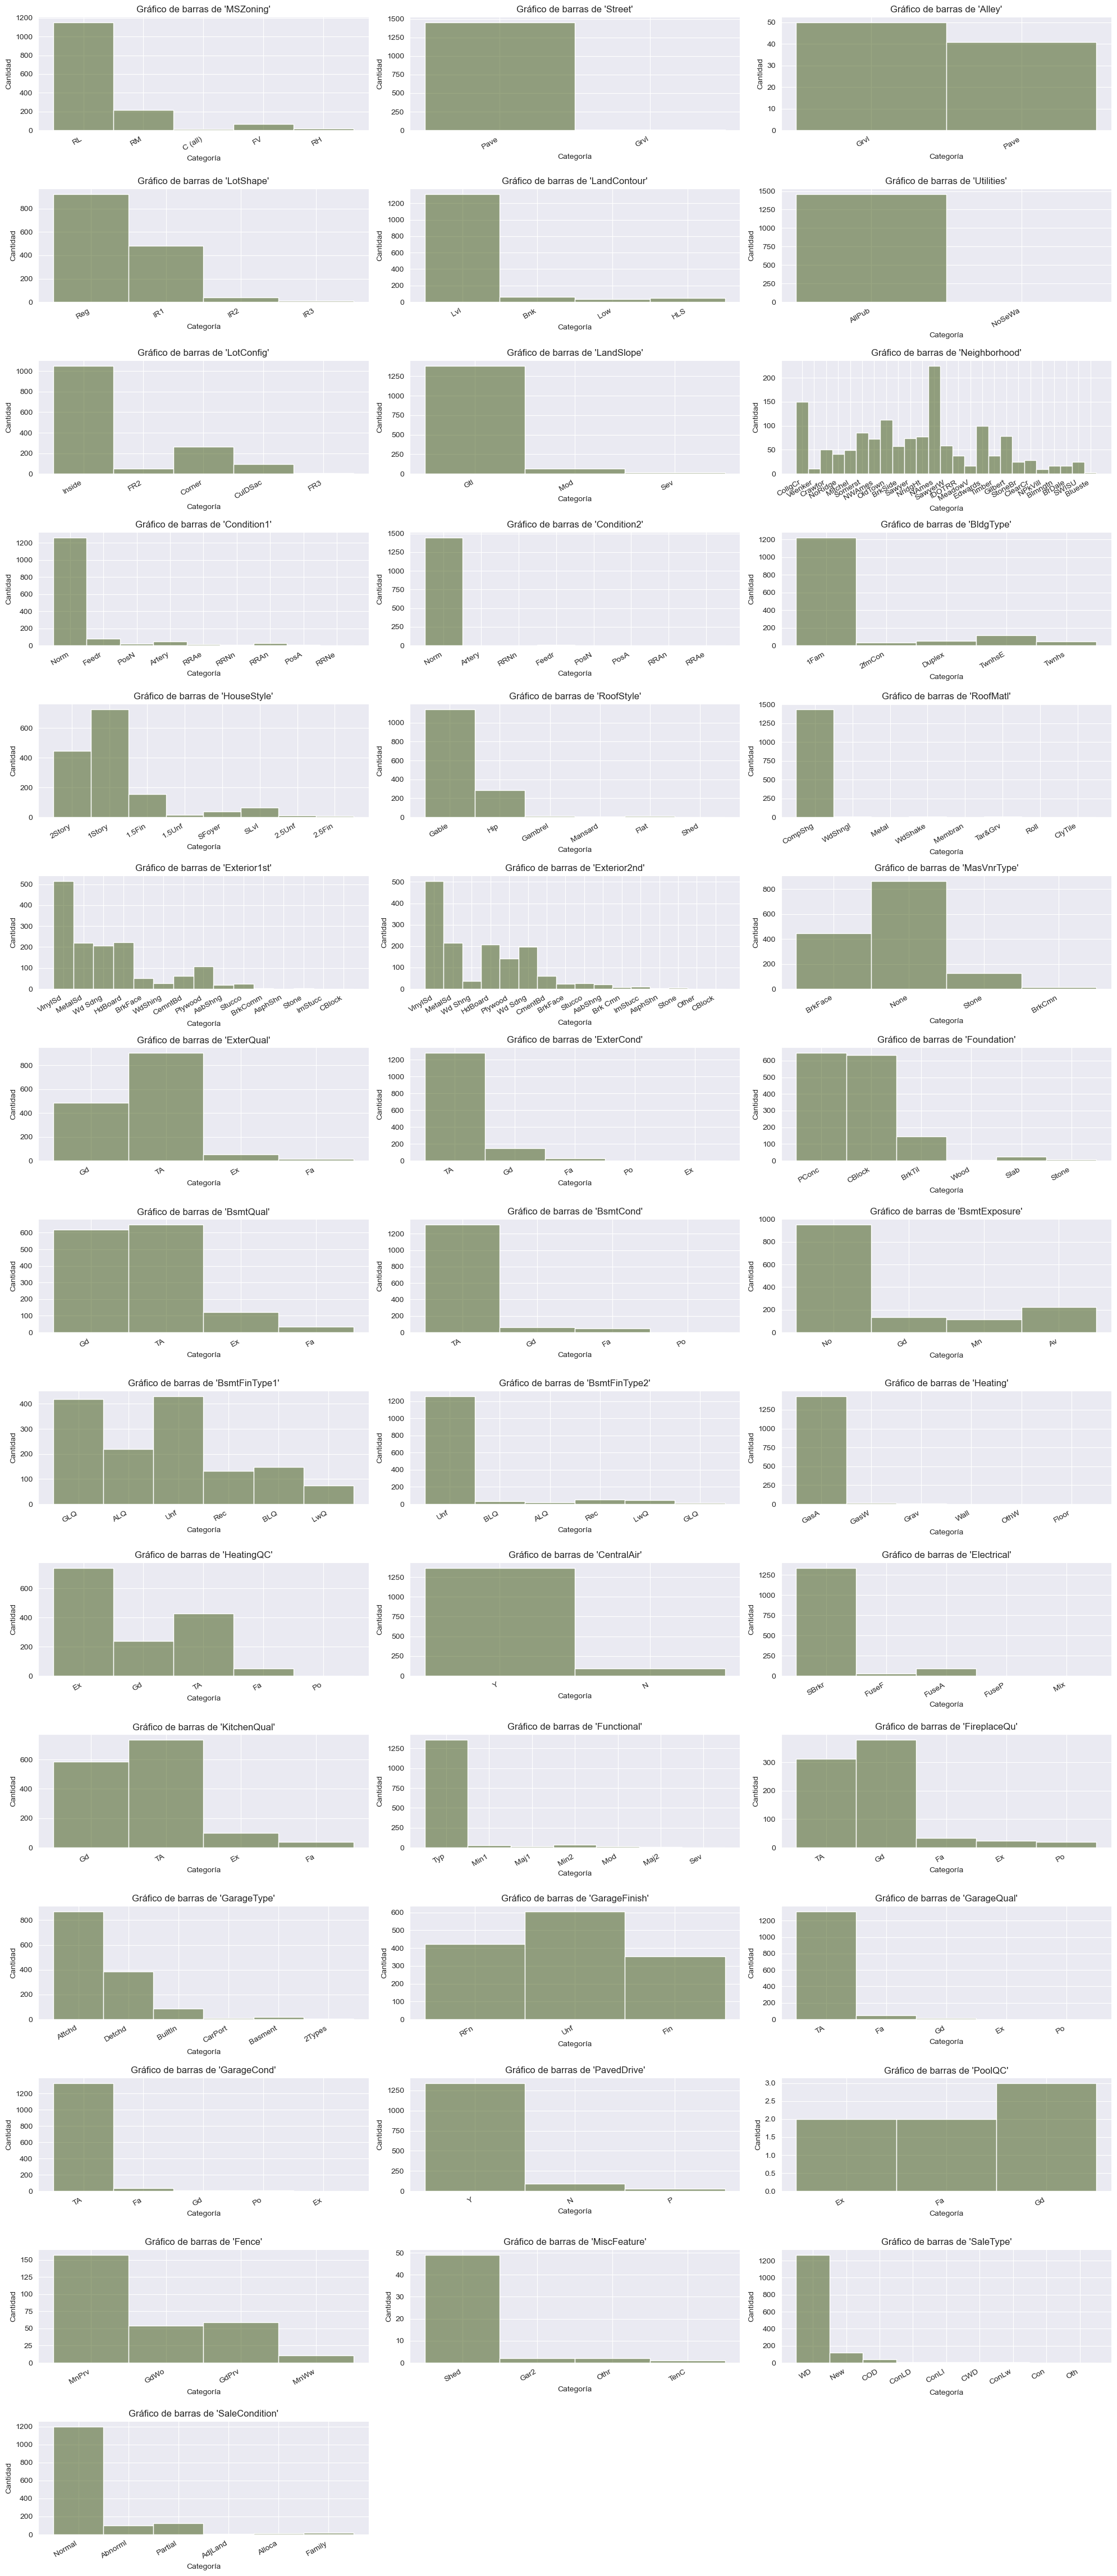

In [15]:
f.distribuciones_categoricas(categorical_columns_train)

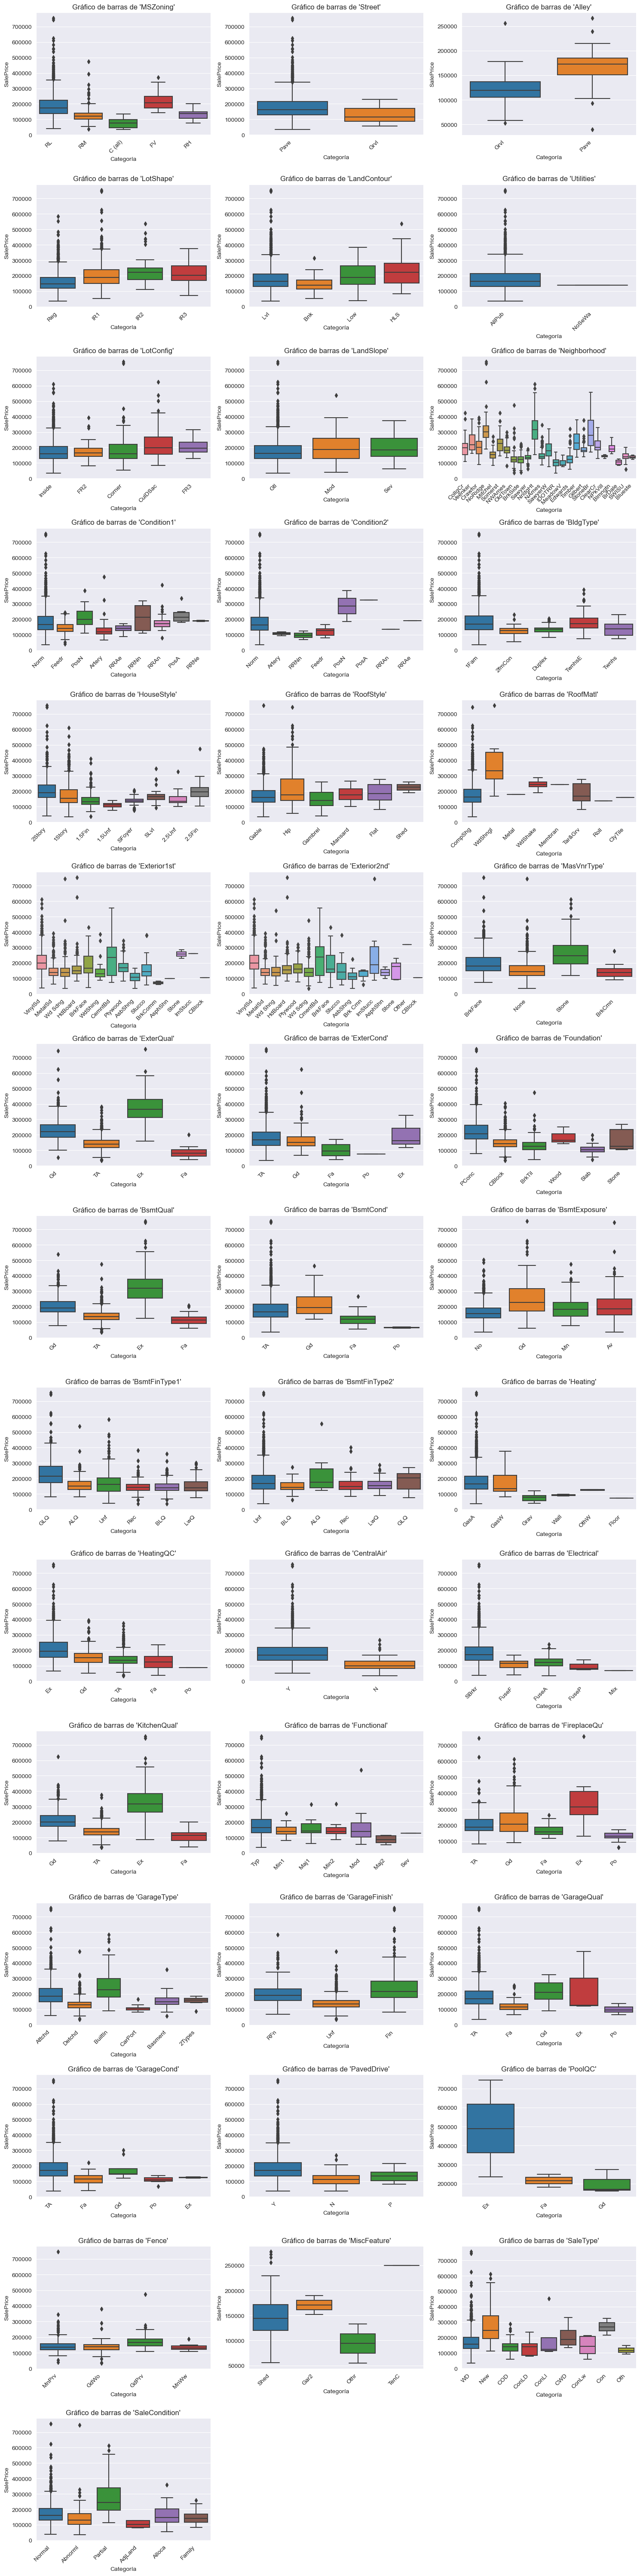

In [16]:
f.boxplot_target_variable(df_train, categorical_columns_train, figsize=(15,60), filas=15, columnas=3)

## <span style="color:orange"> Distribución de nulos

### <span style="color:#87CEEB"> Variables continuas

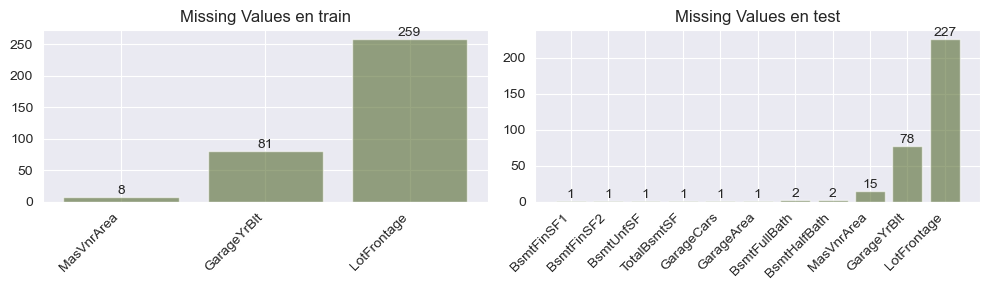

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
f.graph_missing_values(continuous_columns_train, 'train', ax=axes[0])
f.graph_missing_values(continuous_columns_test, 'test', ax=axes[1])

### <span style="color:#87CEEB"> Variables categóricas

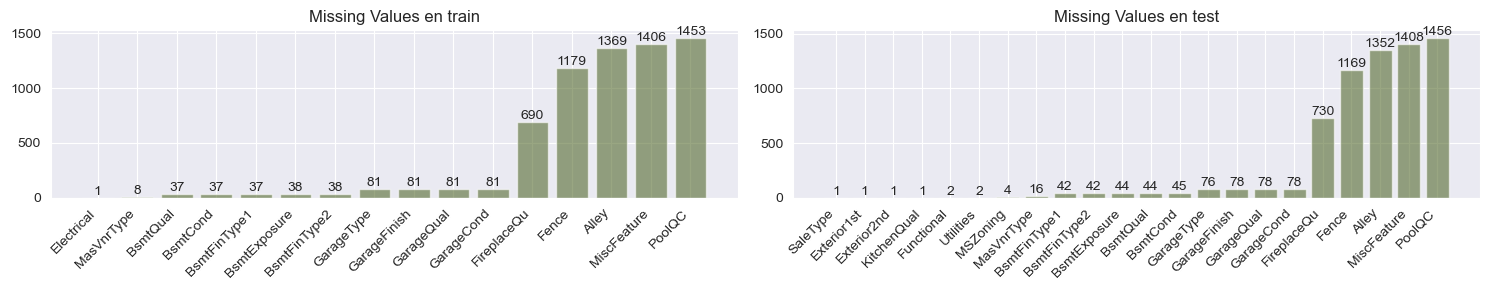

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
f.graph_missing_values(categorical_columns_train, 'train', ax=axes[0])
f.graph_missing_values(categorical_columns_test, 'test', ax=axes[1])

## <span style="color:orange"> Tratamiento de nulos

### <span style="color:#87CEEB"> Variables continuas

In [19]:
display(((continuous_columns_train.isnull().sum() / len(continuous_columns_train)) * 100).round(2))
display(((continuous_columns_test.isnull().sum() / len(continuous_columns_test)) * 100).round(2))

Id                0.00
MSSubClass        0.00
LotFrontage      17.74
LotArea           0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
MasVnrArea        0.55
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageYrBlt       5.55
GarageCars        0.00
GarageArea        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SalePrice         0.00
dtype: float64

Id                0.00
MSSubClass        0.00
LotFrontage      15.56
LotArea           0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
MasVnrArea        1.03
BsmtFinSF1        0.07
BsmtFinSF2        0.07
BsmtUnfSF         0.07
TotalBsmtSF       0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.14
BsmtHalfBath      0.14
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageYrBlt       5.35
GarageCars        0.07
GarageArea        0.07
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
dtype: float64

#### <span style="color:#87CEEB"> Variable LotFrontage

In [20]:
# en este caso los nulos se deja como 0
df_train['LotFrontage'] = np.where(df_train['LotFrontage'].isnull(), 0, df_train['LotFrontage'])
df_test['LotFrontage'] = np.where(df_test['LotFrontage'].isnull(), 0, df_test['LotFrontage'])

#### <span style="color:#87CEEB"> Variables: MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtFullBath, BsmtHalfBath, GarageYrBlt, GarageCars, GarageArea

In [21]:
variables_imputar_cat = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
                        'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

for var in variables_imputar_cat:
    f.imputar_cat_moda(df_train, df_test, var)

#### <span style="color:#87CEEB"> Comprobación de imputación

In [22]:
((df_train.select_dtypes(include=['int64', 'float64']).isnull().sum() / len(df_train.select_dtypes(include=['int64', 'float64']))) * 100).round(2)+ \
((df_test.select_dtypes(include=['int64', 'float64']).isnull().sum() / len(df_test.select_dtypes(include=['int64', 'float64']))) * 100).round(2)

1stFlrSF         0.0
2ndFlrSF         0.0
3SsnPorch        0.0
BedroomAbvGr     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
BsmtUnfSF        0.0
EnclosedPorch    0.0
Fireplaces       0.0
FullBath         0.0
GarageArea       0.0
GarageCars       0.0
GarageYrBlt      0.0
GrLivArea        0.0
HalfBath         0.0
Id               0.0
KitchenAbvGr     0.0
LotArea          0.0
LotFrontage      0.0
LowQualFinSF     0.0
MSSubClass       0.0
MasVnrArea       0.0
MiscVal          0.0
MoSold           0.0
OpenPorchSF      0.0
OverallCond      0.0
OverallQual      0.0
PoolArea         0.0
SalePrice        NaN
ScreenPorch      0.0
TotRmsAbvGrd     0.0
TotalBsmtSF      0.0
WoodDeckSF       0.0
YearBuilt        0.0
YearRemodAdd     0.0
YrSold           0.0
dtype: float64

### <span style="color:#87CEEB"> Variables categóricas

In [23]:
display(((categorical_columns_train.isnull().sum() / len(categorical_columns_train)) * 100).round(2))
display(((categorical_columns_test.isnull().sum() / len(categorical_columns_test)) * 100).round(2))

MSZoning          0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinType2      2.60
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
KitchenQual       0.00
Functional        0.00
FireplaceQu      47.26
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
SaleType          0.00
SaleCondition     0.00
dtype: floa

MSZoning          0.27
Street            0.00
Alley            92.67
LotShape          0.00
LandContour       0.00
Utilities         0.14
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.07
Exterior2nd       0.07
MasVnrType        1.10
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          3.02
BsmtCond          3.08
BsmtExposure      3.02
BsmtFinType1      2.88
BsmtFinType2      2.88
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
KitchenQual       0.07
Functional        0.14
FireplaceQu      50.03
GarageType        5.21
GarageFinish      5.35
GarageQual        5.35
GarageCond        5.35
PavedDrive        0.00
PoolQC           99.79
Fence            80.12
MiscFeature      96.50
SaleType          0.07
SaleCondition     0.00
dtype: floa

In [24]:
display(((categorical_columns_train.isnull().sum() / len(categorical_columns_train)) * 100).round(2))
display(((categorical_columns_test.isnull().sum() / len(categorical_columns_test)) * 100).round(2))

MSZoning          0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinType2      2.60
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
KitchenQual       0.00
Functional        0.00
FireplaceQu      47.26
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
SaleType          0.00
SaleCondition     0.00
dtype: floa

MSZoning          0.27
Street            0.00
Alley            92.67
LotShape          0.00
LandContour       0.00
Utilities         0.14
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.07
Exterior2nd       0.07
MasVnrType        1.10
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          3.02
BsmtCond          3.08
BsmtExposure      3.02
BsmtFinType1      2.88
BsmtFinType2      2.88
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
KitchenQual       0.07
Functional        0.14
FireplaceQu      50.03
GarageType        5.21
GarageFinish      5.35
GarageQual        5.35
GarageCond        5.35
PavedDrive        0.00
PoolQC           99.79
Fence            80.12
MiscFeature      96.50
SaleType          0.07
SaleCondition     0.00
dtype: floa

#### <span style="color:#87CEEB"> Recodificaciones

In [25]:
# 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType'
to_unknown = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']
for var in to_unknown:
    df_train[var] = np.where(df_train[var].isnull(), 'Unknown', df_train[var])
    df_test[var] = np.where(df_test[var].isnull(), 'Unknown', df_test[var])

# Alley
df_train['Alley'] = np.where(df_train['Alley'].isnull(), 'No_alley_access', df_train['Alley'])
df_test['Alley'] = np.where(df_test['Alley'].isnull(), 'No_alley_access', df_test['Alley'])

# 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
to_no_basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for var in to_no_basement:
    df_train[var] = np.where(df_train[var].isnull(), 'No_Basement', df_train[var])
    df_test[var] = np.where(df_test[var].isnull(), 'No_Basement', df_test[var])

# FireplaceQu
df_train['FireplaceQu'] = np.where(df_train['FireplaceQu'].isnull(), 'No_Fireplace', df_train['FireplaceQu'])
df_test['FireplaceQu'] = np.where(df_test['FireplaceQu'].isnull(), 'No_Fireplace', df_test['FireplaceQu'])

# 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
to_no_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for var in to_no_garage:
    df_train[var] = np.where(df_train[var].isnull(), 'No_garage', df_train[var])
    df_test[var] = np.where(df_test[var].isnull(), 'No_garage', df_test[var])

# PoolQC
df_train['PoolQC'] = np.where(df_train['PoolQC'].isnull(), 'No_Pool', df_train['PoolQC'])
df_test['PoolQC'] = np.where(df_test['PoolQC'].isnull(), 'No_Pool', df_test['PoolQC'])

# Fence
df_train['Fence'] = np.where(df_train['Fence'].isnull(), 'No_Fence', df_train['Fence'])
df_test['Fence'] = np.where(df_test['Fence'].isnull(), 'No_Fence', df_test['Fence'])

# MiscFeature
df_train['MiscFeature'] = np.where(df_train['MiscFeature'].isnull(), 'None', df_train['MiscFeature'])
df_test['MiscFeature'] = np.where(df_test['MiscFeature'].isnull(), 'None', df_test['MiscFeature'])

# reemplazo de espacios en blanco
columns_to_replace = ['MSZoning', 'Exterior1st', 'Exterior2nd']
for column in columns_to_replace:
    df_train[column] = df_train[column].str.replace(' ', '_')
    df_test[column] = df_test[column].str.replace(' ', '_')

#### <span style="color:#87CEEB"> Comprobación de imputación

In [26]:
((df_train.select_dtypes(include=['object']).isnull().sum() / len(df_train.select_dtypes(include=['object']))) * 100).round(2) + \
((df_test.select_dtypes(include=['object']).isnull().sum() / len(df_test.select_dtypes(include=['object']))) * 100).round(2)

MSZoning         0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

## <span style="color:orange"> One Hot Encoding para variables categóricas

### <span style="color:#87CEEB"> Concatenación de dataframes

In [27]:
df_concat = pd.concat([df_train, df_test], axis=0)
df_concat

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,MnPrv,Shed,700,7,2006,WD,Normal,NaN


### <span style="color:#87CEEB"> Recodificación variables con binary encoding

In [28]:
object_list = []
for i in df_concat.columns:
    if df_concat[i].dtype == "object":
        object_list.append(i)
        df_concat = pd.concat([df_concat, pd.get_dummies(df_concat[i], prefix=i)], axis=1)

df_concat = df_concat.drop(object_list, axis=1).reset_index(drop=True)
df_concat.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_Unknown,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
df_train_dummies = df_concat.iloc[:1460 ,:]
df_test_dummies = df_concat.iloc[1460 :,:].reset_index(drop=True).drop('SalePrice', axis=1)

In [30]:
display(df_train_dummies.head(2))
display(df_test_dummies.head(2))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_Unknown,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_Unknown,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0


## <span style="color:orange"> Separación de muestras de entrenamiento y pruebas

In [31]:
X = df_train_dummies.drop(['SalePrice', 'Id'], axis=1)
y = df_train_dummies['SalePrice']

# muestras de entrenamiento y validación para df_train
random_state=42
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y,
                                                    test_size=.33, 
                                                    random_state=random_state)

# estandarización
scaler = StandardScaler().fit(X_train_pre)
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)

## <span style="color:orange"> 1era iteración de modelación

In [32]:
models_list = [
    KNeighborsRegressor(),
    RandomForestRegressor(random_state=random_state),  
    AdaBoostRegressor(random_state=random_state),
    GradientBoostingRegressor(random_state=random_state),
    LGBMRegressor(force_col_wise=True, random_state=random_state)
]

In [33]:
model_fit_it1, yhat_train_it1, yhat_it1 = {}, {}, {}

for model in models_list:
    model_fit_tmp, yhat_train_tmp, yhat_tmp = f.modelacion(model, X_train, X_test, y_train, y_test)
    model_fit_it1[str(model)] = model_fit_tmp
    yhat_train_it1[str(model)] = yhat_train_tmp
    yhat_it1[str(model)] = yhat_tmp

Exception in thread Thread-7:
Traceback (most recent call last):
  File "c:\Users\Rodrigo\anaconda3\envs\conda_env_1\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\Rodrigo\anaconda3\envs\conda_env_1\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Rodrigo\anaconda3\envs\conda_env_1\lib\subprocess.py", line 1495, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\Rodrigo\anaconda3\envs\conda_env_1\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte


**** Métricas modelo KNeighborsRegressor() ****



  File "c:\Users\Rodrigo\anaconda3\envs\conda_env_1\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNeighborsRegressor() 
 Métricas en train:
 RMSE train: 33032.61210720322 
 MAE train: 20965.58936605317 
 R2 train: 0.8117676820877218 
 ----------------------------------- 
Métricas en test:
 RMSE test: 46511.2570506239 
 MAE test: 25691.461410788383 
 R2 test: 0.705328741355297 
 ______________________________________________________________________ 

**** Métricas modelo RandomForestRegressor(random_state=42) ****

RandomForestRegressor(random_state=42) 
 Métricas en train:
 RMSE train: 11405.38372794938 
 MAE train: 6773.387433537832 
 R2 train: 0.97755972586929 
 ----------------------------------- 
Métricas en test:
 RMSE test: 32223.224225551494 
 MAE test: 17909.578257261408 
 R2 test: 0.8585641156438316 
 ______________________________________________________________________ 

**** Métricas modelo AdaBoostRegressor(random_state=42) ****

AdaBoostRegressor(random_state=42) 
 Métricas en train:
 RMSE train: 27671.98374236905 
 MAE train: 21941.427883035816 
 R2 train: 0.8679042

## <span style="color:orange"> 2da iteración de modelación

### <span style="color:#87CEEB"> Análisis de Componentes Principales para extraer las principales 30 dimensiones.

In [34]:
X = df_train_dummies.drop(['SalePrice', 'Id'], axis=1)

# ajusto PCA
n_components=30
pca = PCA(n_components=n_components).fit(X)
pca_data = pca.transform(X)

# guarda las dimensiones en un nuevo objeto
pca_df = pd.DataFrame(pca_data , columns=['Dim_{}'.format(i) for i in range(1, n_components + 1)])
pca_df

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7,Dim_8,Dim_9,Dim_10,...,Dim_21,Dim_22,Dim_23,Dim_24,Dim_25,Dim_26,Dim_27,Dim_28,Dim_29,Dim_30
0,-2065.077267,52.167479,-273.719633,748.783319,-166.430731,-98.524663,-181.931098,-4.958979,57.938143,11.382825,...,0.447909,-4.257966,0.201102,0.284434,0.593787,-0.895894,-0.790443,-0.978549,0.983330,-0.588059
1,-911.676346,21.789188,749.254333,225.940747,-46.778739,-42.911223,-78.510477,12.785955,-124.778220,24.762556,...,-7.994578,-1.208245,1.083235,0.367797,-2.514118,0.203691,-0.373413,-0.393748,-0.439625,-0.586513
2,734.604005,113.441348,-464.059345,426.285506,-127.441231,-121.444294,-169.073742,-3.981768,46.458213,65.918502,...,-0.112456,2.707668,-0.454924,-1.244302,0.103207,0.560425,0.583724,-1.658350,0.153430,-0.008619
3,-970.394957,-25.756796,-571.168813,200.401691,-99.214164,-187.054537,18.524915,-44.495014,-61.429023,159.854387,...,4.894906,-3.921333,2.274201,-0.932829,0.152062,-1.071486,1.306315,-0.205989,-0.110167,1.313436
4,3758.394556,652.615290,-539.614142,540.932210,-135.019353,-20.923443,-174.634546,-63.225941,214.268432,161.558736,...,-2.061634,5.488599,-0.742626,0.304269,0.041990,-0.770453,0.301569,-1.724542,0.206143,0.458468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-2604.660447,64.604774,-642.685473,-266.234683,-21.615664,-179.848798,-112.167317,61.284487,-100.861655,11.996128,...,-3.063122,1.609800,0.560322,0.406370,0.296620,0.638597,0.904660,-0.139125,-0.235373,-0.972956
1456,2685.113017,941.815348,552.921326,-99.221666,24.446909,167.117362,514.247990,-51.295215,-93.112095,-88.207145,...,-2.222965,-4.778199,-1.704520,0.228169,-0.508778,1.722214,0.785596,0.419353,0.206170,-0.934329
1457,-1457.850456,632.847869,-1016.210762,522.524064,2401.939416,91.484784,-50.150884,123.520893,-264.846224,-205.167960,...,27.455121,-1.759802,-1.944258,-0.490646,-2.313442,-0.350796,0.063053,-0.494245,-0.248110,-1.063615
1458,-809.597577,-598.554236,320.254632,11.510346,-57.119408,-182.198450,647.802041,902.415460,324.201919,-67.206906,...,19.636471,-2.087293,-1.404823,-0.372903,1.040945,0.128243,-0.597597,0.602584,0.238871,-0.205168


In [35]:
print("Varianza acumulada con 30 dimensiones:", np.cumsum(pca.explained_variance_ratio_)[-1])

Varianza acumulada con 30 dimensiones: 0.9999999020012696


### <span style="color:#87CEEB"> Separación de muestras de entrenamiento y pruebas para PCA

In [36]:
# conjuntos de entrenamiento y validación
X_train_pre_pca, X_test_pre_pca, y_train_pca, y_test_pca = train_test_split(pca_df, df_train_dummies['SalePrice'],
                                                    test_size=0.33,
                                                    random_state=random_state)

# estandarización
scaler = StandardScaler().fit(X_train_pre_pca)
X_train_pca = pd.DataFrame(scaler.transform(X_train_pre_pca), columns=X_train_pre_pca.columns)
X_test_pca = pd.DataFrame(scaler.transform(X_test_pre_pca), columns=X_test_pre_pca.columns)

In [37]:
model_fit_it2, yhat_train_it2, yhat_it2 = {}, {}, {}

for model in models_list:
    model_fit_tmp, yhat_train_tmp, yhat_tmp = f.modelacion(model, X_train_pca, X_test_pca, y_train_pca, y_test_pca)
    model_fit_it2[str(model)] = model_fit_tmp
    yhat_train_it2[str(model)] = yhat_train_tmp
    yhat_it2[str(model)] = yhat_tmp

**** Métricas modelo KNeighborsRegressor() ****

KNeighborsRegressor() 
 Métricas en train:
 RMSE train: 34749.25298888012 
 MAE train: 22050.146216768917 
 R2 train: 0.7916951888246867 
 ----------------------------------- 
Métricas en test:
 RMSE test: 48775.03145016819 
 MAE test: 28266.600414937755 
 R2 test: 0.6759464826061505 
 ______________________________________________________________________ 

**** Métricas modelo RandomForestRegressor(random_state=42) ****

RandomForestRegressor(random_state=42) 
 Métricas en train:
 RMSE train: 12550.778647467121 
 MAE train: 7711.317709611451 
 R2 train: 0.9728262425004145 
 ----------------------------------- 
Métricas en test:
 RMSE test: 39762.36738267123 
 MAE test: 21726.40182572614 
 R2 test: 0.7846394801452372 
 ______________________________________________________________________ 

**** Métricas modelo AdaBoostRegressor(random_state=42) ****

AdaBoostRegressor(random_state=42) 
 Métricas en train:
 RMSE train: 30978.030907160428

## <span style="color:orange"> 3ra iteración de modelación

    Para la búsqueda de grilla se utizarán los datos de entrenamiento y validación obtenidos en la 1ra iteración ya que las métricas obtenidas de esta manera son mejores a las que se obtuvieron mediante PCA.

### <span style="color:#87CEEB"> KNeighborsRegressor

In [38]:
knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform'], # con distance da mal el train
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],  # Manhattan (1), Euclidean (2)
}

knn_gridsearch = GridSearchCV(KNeighborsRegressor(),
                                knn_params,
                                cv=5,
                                n_jobs=-1)

model_knn_3_fit, yhat_train_knn_3, yhat_knn_3 = f.modelacion(knn_gridsearch, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_knn_3_fit.best_params_)

# tiempo: 5s

**** Métricas modelo GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform']}) ****

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform']}) 
 Métricas en train:
 RMSE train: 32775.93427038641 
 MAE train: 20349.854805725972 
 R2 train: 0.814681611476009 
 ----------------------------------- 
Métricas en test:
 RMSE test: 41011.133168088294 
 MAE test: 22787.203615886185 
 R2 test: 0.7708999614488778 
 ______________________________________________________________________ 

Mejores hiperparámetros:
 {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


### <span style="color:#87CEEB"> RandomForestRegressor

In [39]:
rf_params = {
    'n_estimators': [10, 50, 100, 300, 500],
    'criterion': ['friedman_mse', 'absolute_error'],
    'max_depth': [None, 10, 20],
}

rf_gridsearch = GridSearchCV(RandomForestRegressor(random_state=random_state),
                                rf_params,
                                cv=5,
                                n_jobs=-1)

model_rf_3_fit, yhat_train_rf_3, yhat_rf_3 = f.modelacion(rf_gridsearch, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_rf_3_fit.best_params_)

# tiempo: 12 min

**** Métricas modelo GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'absolute_error'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100, 300, 500]}) ****

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'absolute_error'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100, 300, 500]}) 
 Métricas en train:
 RMSE train: 11216.285187341377 
 MAE train: 6719.631633946831 
 R2 train: 0.9782976660768663 
 ----------------------------------- 
Métricas en test:
 RMSE test: 32324.8300442935 
 MAE test: 17869.60658298755 
 R2 test: 0.857670762111762 
 ______________________________________________________________________ 

Mejores hiperparámetros:
 {'criterion': 'absolute_error', 'max_depth': None, 'n_estimato

### <span style="color:#87CEEB"> AdaBoostRegressor

In [40]:
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

adaboost_gridsearch = GridSearchCV(AdaBoostRegressor(random_state=random_state),
                                adaboost_params,
                                cv=5,
                                n_jobs=-1)

model_adaboost_3_fit, yhat_train_adaboost_3, yhat_adaboost_3 = f.modelacion(adaboost_gridsearch, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_adaboost_3_fit.best_params_)

# tiempo: 30s

**** Métricas modelo GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200]}) ****

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200]}) 
 Métricas en train:
 RMSE train: 25941.856448319973 
 MAE train: 20701.184711525024 
 R2 train: 0.8839058172536328 
 ----------------------------------- 
Métricas en test:
 RMSE test: 33261.827905000224 
 MAE test: 22618.341289160177 
 R2 test: 0.8492997932897933 
 ______________________________________________________________________ 

Mejores hiperparámetros:
 {'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 100}


### <span style="color:#87CEEB"> GradientBoostingRegressor

In [41]:
gboost_params = {
    'loss': ['squared_error', 'absolute_error'],
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [50, 100, 200],
    'subsample': np.linspace(0.1, 1.0, 10, endpoint=True, dtype=float),
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ['None', 'sqrt', 'log2']
}

gboost_gridsearch = GridSearchCV(GradientBoostingRegressor(random_state=random_state),
                                gboost_params,
                                cv=5,
                                n_jobs=-1)

model_gboost_3_fit, yhat_train_gboost_3, yhat_gboost_3 = f.modelacion(gboost_gridsearch, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_gboost_3_fit.best_params_)

# tiempo: 2 min

**** Métricas modelo GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_features': ['None', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200],
                         'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}) ****

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_features': ['None', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200],
                         's

### <span style="color:#87CEEB"> LGBMRegressor

In [42]:
lgbm_params = {
    'num_leaves': [20, 30, 40],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [5, 10, 20],
}

lgbm_gridsearch = GridSearchCV(LGBMRegressor(force_col_wise=True, random_state=random_state),
                                lgbm_params,
                                cv=5,
                                n_jobs=-1)

model_lgbm_3_fit, yhat_train_lgbm_3, yhat_lgbm_3 = f.modelacion(lgbm_gridsearch, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_lgbm_3_fit.best_params_)

# tiempo: 2 min

**** Métricas modelo GridSearchCV(cv=5,
             estimator=LGBMRegressor(force_col_wise=True, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [20, 30, 40]}) ****

[LightGBM] [Info] Total Bins 3229
[LightGBM] [Info] Number of data points in the train set: 978, number of used features: 184
[LightGBM] [Info] Start training from score 181046.955010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

#### <span style="color:#87CEEB"> VotingClassifier 1

In [43]:
estimadores_v1 = [
    ('RandomForestRegressor', model_rf_3_fit.best_estimator_),
    ('GradientBoostingRegressor', model_gboost_3_fit.best_estimator_),
    ('LGBMRegressor', model_lgbm_3_fit.best_estimator_)
]

voting_model_v1 = VotingRegressor(estimators=estimadores_v1,
                                verbose=True,
                                n_jobs=-1)

model_voting_fit_1, yhat_train_voting_1, yhat_voting_1 = f.modelacion(voting_model_v1, X_train, X_test, y_train, y_test)

# tiempo: 2.5 min

**** Métricas modelo VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(criterion='absolute_error',
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('GradientBoostingRegressor',
                             GradientBoostingRegressor(max_features='sqrt',
                                                       n_estimators=200,
                                                       random_state=42,
                                                       subsample=0.4)),
                            ('LGBMRegressor',
                             LGBMRegressor(force_col_wise=True, max_depth=3,
                                           n_estimators=200, num_leaves=20,
                                           random_state=42))],
                n_jobs=-1, verbose=True) ****

VotingRegressor(estimators=[('RandomForestRegre

#### <span style="color:#87CEEB"> VotingClassifier 2

In [44]:
estimadores_v2 = [
    #('RandomForestRegressor', model_rf_3_fit.best_estimator_),
    ('GradientBoostingRegressor', model_gboost_3_fit.best_estimator_),
    ('LGBMRegressor', model_lgbm_3_fit.best_estimator_)
]

voting_model_v2 = VotingRegressor(estimators=estimadores_v2,
                                verbose=True,
                                n_jobs=-2)

model_voting_fit_2, yhat_train_voting_2, yhat_voting_2 = f.modelacion(voting_model_v2, X_train, X_test, y_train, y_test)

# tiempo: 6s

**** Métricas modelo VotingRegressor(estimators=[('GradientBoostingRegressor',
                             GradientBoostingRegressor(max_features='sqrt',
                                                       n_estimators=200,
                                                       random_state=42,
                                                       subsample=0.4)),
                            ('LGBMRegressor',
                             LGBMRegressor(force_col_wise=True, max_depth=3,
                                           n_estimators=200, num_leaves=20,
                                           random_state=42))],
                n_jobs=-2, verbose=True) ****

VotingRegressor(estimators=[('GradientBoostingRegressor',
                             GradientBoostingRegressor(max_features='sqrt',
                                                       n_estimators=200,
                                                       random_state=42,
                                        

In [45]:
estimadores_v3 = [
    ('RandomForestRegressor', model_rf_3_fit.best_estimator_),
    #('GradientBoostingRegressor', model_gboost_3_fit.best_estimator_),
    ('LGBMRegressor', model_lgbm_3_fit.best_estimator_)
]

voting_model_v3 = VotingRegressor(estimators=estimadores_v3,
                                verbose=True,
                                n_jobs=-1)

model_voting_fit_3, yhat_train_voting_3, yhat_voting_3 = f.modelacion(voting_model_v3, X_train, X_test, y_train, y_test)

# tiempo: 2.5 min

**** Métricas modelo VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(criterion='absolute_error',
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('LGBMRegressor',
                             LGBMRegressor(force_col_wise=True, max_depth=3,
                                           n_estimators=200, num_leaves=20,
                                           random_state=42))],
                n_jobs=-1, verbose=True) ****

VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(criterion='absolute_error',
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('LGBMRegressor',
                             LGBMRegressor(force_col_wise=True, max_depth=3,
   

In [46]:
estimadores_v4 = [
    ('RandomForestRegressor', model_rf_3_fit.best_estimator_),
    ('GradientBoostingRegressor', model_gboost_3_fit.best_estimator_),
    #('LGBMRegressor', model_lgbm_3_fit.best_estimator_)
]

voting_model_v4 = VotingRegressor(estimators=estimadores_v4,
                                verbose=True,
                                n_jobs=-1)

model_voting_fit_4, yhat_train_voting_4, yhat_voting_4 = f.modelacion(voting_model_v4, X_train, X_test, y_train, y_test)

# tiempo: 2.5 min

**** Métricas modelo VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(criterion='absolute_error',
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('GradientBoostingRegressor',
                             GradientBoostingRegressor(max_features='sqrt',
                                                       n_estimators=200,
                                                       random_state=42,
                                                       subsample=0.4))],
                n_jobs=-1, verbose=True) ****

VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(criterion='absolute_error',
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('Gradie

In [47]:
estimadores_v5 = [
    ('RandomForestRegressor', model_rf_3_fit.best_estimator_),
    ('AdaBoostRegressor', model_adaboost_3_fit.best_estimator_),
    ('GradientBoostingRegressor', model_gboost_3_fit.best_estimator_),
    ('LGBMRegressor', model_lgbm_3_fit.best_estimator_)
]

voting_model_v5 = VotingRegressor(estimators=estimadores_v5,
                                verbose=True,
                                n_jobs=-1)

model_voting_fit_v5, yhat_train_voting_v5, yhat_voting_v5 = f.modelacion(voting_model_v5, X_train, X_test, y_train, y_test)

# tiempo: 2.5 min

**** Métricas modelo VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(criterion='absolute_error',
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('AdaBoostRegressor',
                             AdaBoostRegressor(loss='exponential',
                                               n_estimators=100,
                                               random_state=42)),
                            ('GradientBoostingRegressor',
                             GradientBoostingRegressor(max_features='sqrt',
                                                       n_estimators=200,
                                                       random_state=42,
                                                       subsample=0.4)),
                            ('LGBMRegressor',
                             LGBMRegressor(force_col_wise=True

    Para la selección del mejor modelo se consideró obtener el menor valor de RMSE y adicionalmente tener un bajo valor de MAE ya que esta métrica indica claramente en cuánto puede variar el valor de una casa. Por lo que el modelo seleccionado es un VotingRegressor que integra los modelos RandomForestRegressor, GradientBoostingRegressor y LGBMRegressor, todos en su tercera iteración.
    Con esta combinación se obtiene un RMSE de 29661.228 y un MAE de 15832.778 dólares.

## <span style="color:orange"> Evaluación en la muestra de pruebas df_test

In [48]:
# muestra de prueba del dataset test.csv
X_val = df_test_dummies.loc[:, 'MSSubClass':]

# predicciones en dataset test.csv
y_pred = model_gboost_3_fit.predict(X_val)

# Dataset submission
submission = pd.DataFrame({'Id': df_test_dummies['Id'], 'SalePrice': y_pred}).round()
submission

,Id,SalePrice
0,1461,319706.0
1,1462,351805.0
2,1463,340550.0
3,1464,395705.0
4,1465,334252.0
...,...,...
1454,2915,275064.0
1455,2916,301170.0
1456,2917,324958.0
1457,2918,278078.0


#### <span style="color:#87CEEB"> Creación de archivo submission.csv solicitado en la competencia

In [49]:
# guardado en archivo csv
submission.to_csv('submission.csv', index=False)